<p align=center>
<img src="assets/cphbanner.png" width=1280>
</p>

# **Project 1: Survival Analysis and Prediction [30 points]**

Many clinical trials and observational studies involve following patients for a long time. The primary event of
interest in those studies may include death, relapse, or the onset of a new disease. The follow-up time for a trial
or a study may range from few weeks to many years. To analyze this data, we typically conduct time-to-event
analysis and build predictive models that learn time-to-event distributions. The goal of this project is to test
your ability to conduct basic survival analyses as well as develop ML models for survival prediction.

### Instructions

This is <u> not a group project and students will be graded individually</u>. This project has two deliverables:

- A report summarizing your results. The report should include point-by-point answers to the questions below. Please submit your report (in pdf format) via the [bcourses](https://bcourses.berkeley.edu/courses/1531248) website for CPH200B.
- A zip file with your codebase. You can fork this repo and add your code to it. Please submit both your code and report using the [Gradescope](https://www.gradescope.com/courses/684408) website for CPH200B. You will get feedback on both your report and code via Gradescope.

**Please submit your report and code by <u> Thursday 2/1 11:59 PST </u>.**

## Task 1.1: Nonparametric Survival Analysis in Heart Failure [7 pts]

Nonparametric models of survival data do not make parametric assumptions on the distribution of timeto-event outcomes. They are widely used in clinical studies to derive descriptive statistics of survival in a population. In this task, we will apply standard nonparametric estimators to analyze survival of heart failure patients in a recent, widely-recognized study [1].

####  Setup and Dataset

The dataset we will use in this task was extracted from the electronic health records (EHRs) of 299 heart failure patients from the Faisalabad Institute of Cardiology and at the Allied Hospital in Faisalabad (Punjab, Pakistan), during April–December 2015. The cohort included 105 women and 194 men, and their ages range between 40 and 95 years old. All 299 patients had left ventricular systolic dysfunction and had previous heart failures (HF) that put them in classes III or IV of New York Heart Association (NYHA) classification of the stages of heart failure. The dataset contains 13 features, which report clinical, body, and lifestyle information. The patients were followed up for 130 days on average (maximum follow-up period was 285 days). The event of interest was death during the follow-up period. 

The dataset is publicly accessible and was shared with the class through UCSF Box. You can load the dataset in the directory "./data" and inspect all the features/outcomes using pandas as follows:

In [2]:
import pandas as pd

dataset = pd.read_csv("data/heart_failure_clinical_records_dataset.csv")

In [2]:
dataset

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


#### Tasks and Deliverables

Please conduct the following tasks on the dataset described above. Your report should include the results for every task (i.e., tables or plots) along with your answers to the questions associated with each task.

**Task 1.1.1 [3 pt].** Given the data stored in the pandas dataframe *dataset*, do the following: 

- **[1 pt]** Implement the Kaplan-Meier point estimator from scratch in Python.

- **[1 pt]** Apply your estimator to *dataset* to estimate survival in HF patients. Compare your results with the built-in functions in the “lifelines” library. 

- **[1 pt]** Additionally, compare your survival rate estimates with the prognoses of HF patients in the US as reported in the literature. If there are differences between your results and statistics reported in the literature, explain what might be causing them.

**Task 1.1.2 [2 pt].** Use the “lifelines” library to plot the confidence intervals around your estimated survival curve and comment on how the lengths of these intervals change over time **[1 pt]**. Explain the methodology used to compute these confidence intervals **[1 pt]**.

**Task 1.1.3 [2 pt].** Instead of the *nonparametric* Kaplan-Meier estimator, one can estimate a survival curve using a *parametric* model that makes assumptions about the distribution of survival times. Assume that the survival time in this population follows an **exponential distribution**. Propose an algorithm for fitting the parameters of this parametric model **[1 pt]**. Compare the results of the fitted exponential distribution with the Kaplan-Meier estimate and comment on the limitations of the parametric model.

## Solution

### Task 1.1.1

In [4]:
# >> Write your code here <<
import numpy as np
        
class KaplanMeierEstimator:

    def __init__(self, label):
        self.label = label
        
    def fit(self, T, E):
        
        self.S = [1]
        time_range = T.unique()
        
        for t in time_range:
            self.S.append(self.S[-1] * (1 - self.qt_hat(t)))

    def qt_hat(self, t):
        dt, nt = 0, 0
        for index, row in dataset.iterrows():
            if row['time'] == t and row['DEATH_EVENT'] == 1:
                dt += 1

            if row['time'] < t:
                continue
            else:
                nt += 1
                
        return dt / nt

            

In [5]:
my_kme = KaplanMeierEstimator(label="Kaplan-Meier estimator (scratch)")
my_kme.fit(dataset['time'], dataset['DEATH_EVENT'])

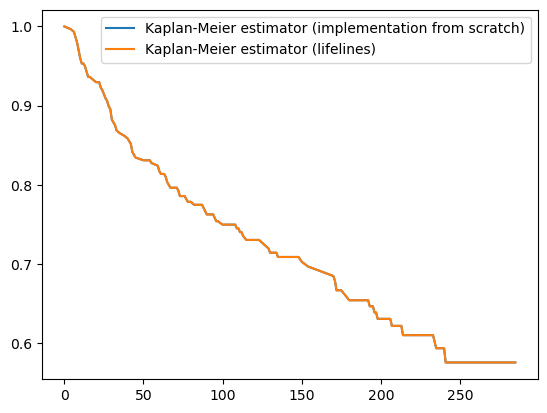

In [6]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

kmf = KaplanMeierFitter(label="Kaplan-Meier estimator (lifelines)")
kmf.fit(dataset['time'], dataset['DEATH_EVENT'])
kmf_S = kmf.survival_function_

ax.plot(kmf_S.index, my_kme.S, label="Kaplan-Meier estimator (implementation from scratch)")
ax.plot(kmf_S.index, kmf_S.values, label="Kaplan-Meier estimator (lifelines)")

ax.legend()

plt.savefig('1.1.1.png', dpi=100)
plt.show()

### Task 1.1.2

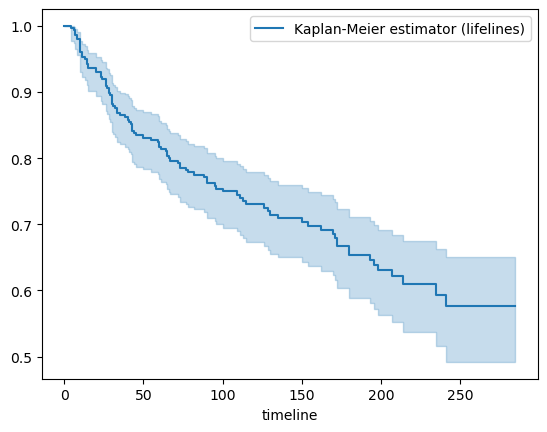

In [117]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter(label="Kaplan-Meier estimator (lifelines)", alpha=0.05) # (default alpha=0.05) 95% confidence interval
kmf.fit(dataset['time'], dataset['DEATH_EVENT'])
kmf.plot()

plt.savefig('1.1.2.png', dpi=100)
plt.show()

### Task 1.1.3

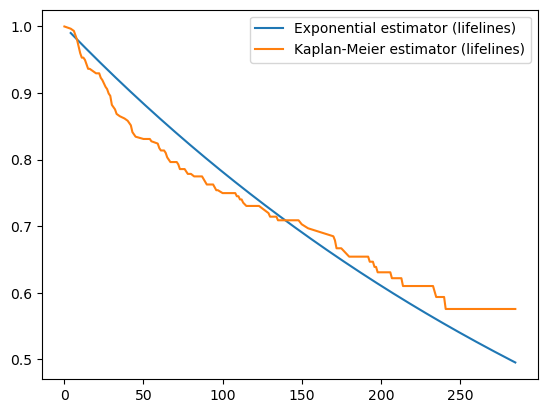

In [7]:
from lifelines import KaplanMeierFitter, ExponentialFitter

fig = plt.figure()
ax = plt.subplot(111)


expf = ExponentialFitter(label="Exponential estimator (lifelines)")
expf.fit(dataset['time'], dataset['DEATH_EVENT'])
expf_S = expf.survival_function_
ax.plot(expf_S.index, expf_S.values, label="Exponential estimator (lifelines)")

kmf = KaplanMeierFitter(label="Kaplan-Meier estimator (lifelines)")
kmf.fit(dataset['time'], dataset['DEATH_EVENT'])
kmf_S = kmf.survival_function_
ax.plot(kmf_S.index, kmf_S.values, label="Kaplan-Meier estimator (lifelines)")


ax.legend()

plt.savefig('1.1.3.png', dpi=100)
plt.show()

## Task 1.2:  Survival Regression using the Cox PH Model [8 pts]

####  Setup and Dataset

In Task 1.1, we used nonparametric estimators to derive descriptive statistics of survival in a population. However, these estimators did not learn the relationship between the patient features and their individuallevel survival outcomes. In this Task, we will fit one of the most widely used survival models, the Cox Proportional Hazards (PH) model, to understand how patient features influence survival. We will use the same dataset in Task 1.1 and the built-in Cox model in lifelines for this task.

#### Tasks and Deliverables

**Task 1.2.1 [3 pts].** Fit a Cox PH model using the dataset of HF patients described earlier **[1 pt]**. Report all model coefficients **[1 pt]**. Based on your model, what is the effect of a one-year increment in age on patient survival? **[1 pt]**

**Task 1.2.2 [2 pt].** Evaluate the predictive accuracy of the Cox PH within the training sample using the Concordance index (C-index) **[1 pt]**. Explain the differences between the C-index and the AUC-ROC metrics **[1 pt]**.

**Task 1.2.3 [3 pt].** After presenting the Cox model fitted in **Task 1.2.1** to your clinical collaborator, they mention that they believe that age is a bigger risk focator for HF in males compared to females. Your clinical collaborator asks you to test his hypothesis. Propose a new Cox model to test this hypothesis by modifying the original feature space **[2 pt]**. Fit this new model using the same dataset, and comment on the validity of the clinician's hypothesis based on your fitted model **[1 pt]**.

## Solution

### Task 1.2.1

In [106]:
# >> Write your code here <<
from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(dataset, 'time', 'DEATH_EVENT')
print('Model coefficients:\n')
print(cph.params_)
# cph.print_summary()

Model coefficients:

covariate
age                         4.640818e-02
anaemia                     4.601351e-01
creatinine_phosphokinase    2.207372e-04
diabetes                    1.398843e-01
ejection_fraction          -4.894160e-02
high_blood_pressure         4.757492e-01
platelets                  -4.635209e-07
serum_creatinine            3.210338e-01
serum_sodium               -4.418745e-02
sex                        -2.375218e-01
smoking                     1.289225e-01
Name: coef, dtype: float64


In [84]:
print('effect of a one-year increment in age on patient survival = ', np.exp(cph.params_['age'])) # exp(β) Hazard ratio for a one-unit increase in the feature

effect of a one-year increment in age on patient survival =  1.0475018915176093


### Task 1.2.2

In [102]:
print('Concordance index(C-index) = ', cph.concordance_index_)

Concordance index(C-index) =  0.7408047632766734


### Task 1.2.3

In [118]:
dataset['new_feature'] = dataset['age'] * dataset['sex']

In [120]:
cph = CoxPHFitter()
cph.fit(dataset, 'time', 'DEATH_EVENT')
print('Model coefficients:\n')
print(cph.params_)

Model coefficients:

covariate
age                         3.582879e-02
anaemia                     4.471405e-01
creatinine_phosphokinase    2.113217e-04
diabetes                    1.269314e-01
ejection_fraction          -4.851748e-02
high_blood_pressure         4.630169e-01
platelets                  -4.267375e-07
serum_creatinine            3.154864e-01
serum_sodium               -4.188395e-02
sex                        -1.259467e+00
smoking                     1.408466e-01
new_feature                 1.594072e-02
Name: coef, dtype: float64


In [121]:
cph.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
age,3.582879e-02,1.036478,0.016061,0.004349,0.067309,1.004359,1.069625,0.0,2.230743,0.025698,5.282192
anaemia,4.471405e-01,1.563834,0.217128,0.021578,0.872703,1.021813,2.393371,0.0,2.059344,0.039461,4.663418
creatinine_phosphokinase,2.113217e-04,1.000211,0.000101,0.000014,0.000408,1.000014,1.000408,0.0,2.101993,0.035554,4.813849
diabetes,1.269314e-01,1.135339,0.224250,-0.312590,0.566452,0.731550,1.762005,0.0,0.566027,0.571375,0.807490
ejection_fraction,-4.851748e-02,0.952641,0.010420,-0.068940,-0.028095,0.933382,0.972296,0.0,-4.656188,0.000003,18.243982
high_blood_pressure,4.630169e-01,1.588860,0.217274,0.037168,0.888865,1.037868,2.432368,0.0,2.131031,0.033087,4.917611
platelets,-4.267375e-07,1.000000,0.000001,-0.000003,0.000002,0.999997,1.000002,0.0,-0.379793,0.704099,0.506150
serum_creatinine,3.154864e-01,1.370926,0.070251,0.177797,0.453176,1.194583,1.573301,0.0,4.490845,0.000007,17.104945
serum_sodium,-4.188395e-02,0.958981,0.023607,-0.088153,0.004385,0.915621,1.004395,0.0,-1.774199,0.076030,3.717283


## Task 1.3: Developing an ML-based Survival Prediction Model [15 pts]

In **Tasks 1.1** and **1.2**, we applied existing methods for survival analysis out of the box. In this Task, you will develop your own ML-based model for survival prediction and apply it to a dataset of heart transplant patients. The dataset is shared with you via **UCSF Box**.

#### Clinical background

Heart transplantation is a critical surgical intervention designed to save lives by replacing a patient's diseased heart with a healthy one obtained from a deceased donor. This procedure is typically considered when no other viable medical or surgical alternatives exist for the patient. The majority of heart transplantations are performed on individuals facing "end-stage" heart failure. "End-stage" refers to a condition that has progressed to such an advanced state that all available treatments, except for a heart transplant, have proven ineffective. Due to the scarcity of donor hearts, individuals in need of a heart transplant undergo a meticulous selection process at specialized heart transplant centers. Those deemed eligible are then placed on a waiting list, underscoring the critical importance of timely organ availability in this life-saving procedure.

####  Setup and Dataset

For this task, we will use data collected by the United Network for Organ Sharing (UNOS) [2], a non-profit organization that administers the only Organ Procurement and Transplantation Network (OPTN) in the US. UNOS is involved in many aspects of the organ transplant and donation process in the US, including data collection and maintenance, providing assitance to patients and care takers, and informing policy makers on the best use of the limited supply of organs and give all patients a fair chance at receiving the organ they need. UNOS manages the heart transplant waiting list, i.e., the list of terminally-ill patients waiting for donor heart. In order to determine the order of priority for receipt of a donor heart, individuals are classified by degrees of severity for a donor heart, blood type, body weight, and geographic location.

This Task will focus on the cohort of terminally-ill patients who are enrolled in the wait-list for heart transplantation. In this setup, our goal is to predict the patients who are less likely to survive in order to prioritize them for receiving donated organs. The UNOS data covers 30 years of heart transplantation data in the US, spanning the years from 1985 to 2015. We will use data for patients who were on the wait-list for heart transplantation in the US from 1985 to 2010 (27,926 patients) to train an ML-based model for predicting individual-level survival. A held-out test set of 8,403 patients enrolled in the wait-list between 2010 and 2015 will be used by the instructor to evaluate your model. You can load the UNOS data in pandas as follows.

In [57]:
UNOS_data           = pd.read_csv("data/UNOS_train.csv")

#### Feature Dictionary

Each patient's record in the UNOS database is associated with the following variables:

In [58]:
patient_variables   = ["init_age", "gender", "hgt_cm_tcr", "wgt_kg_tcr", "diab", "ventilator_tcr",
                       "ecmo_tcr", "most_rcnt_creat", "abo_A", "abo_B", "abo_O", "vad_while_listed",
                       "days_stat1", "days_stat1a", "days_stat2", "days_stat1b", "iabp_tcr",  
                       "init_bmi_calc", "tah", "inotropic", "Censor (Censor = 1)", "Survival Time"]

The interpretation of each variable is provided below:

- "init_age": Patient's age at time of enrolling in the wait-list
- "gender": Patient's biological sex
- "hgt_cm_tcr": Patient's height in cm
- "wgt_kg_tcr": Patient's weight in kgs
- "diab": Indication on whether or not the patient is diabetic
- "abo_A": Indication on whether patient's blood type is A
- "abo_B": Indication on whether patient's blood type is B
- "abo_O": Indication on whether patient's blood type is O
- "ventilator_tcr": Indication on whether the patient was dependent on a ventilator at time of enrollment in the wait-list
- "ecmo_tcr": Indication on whether the patient was treated with ECMO (extracorporeal membrane oxygenation) by the time they where enrolled in the wait-list. ECMO is an artificial life support that continuously pumps blood out of the patient's body and sends it through a series of devices that add oxygen and remove carbon dioxide, pumping the blood back to the patient. It is used for a patient whose heart and lungs are not functioning properly.  
- "most_rcnt_creat": Creatinine level in the patient's most recent blood test before enrolling in wait-list.
- "vad_while_listed": Whether the patient was on ventricular assist device (VAD) support when listed for a heart transplant. VAD is a mechanical pump used to restore cardiac function by pumping blood from the lower chambers of the heart to the rest of the body.
- "iabp_tcr": Whether the patient was on Intra-Aortic Balloon Pump (IABP) Therapy. This is a therapeutic device used to improve blood flow when the heart is unable to pump enough blood for your body.
- "init_bmi_calc": Patient's Body Mass Index at time of enrollment in the wait-list.
- "tah": Whether the patient underwent a total artificial heart (TAH) surgery. This is a mechanical pump that replaces the heart when it is not working as it should.
- "inotropic": Whether the patient was on an Inotropic drug at time of enrollment in wait-list. These are medicines that change the force of the heart's contractions.
- "days_stat1", "days_stat1a", "days_stat1b", "days_stat2": UNOS has an internal system for classifying the priority of patients for receiving a heart transplant. Individuals classified as Status 1A have the highest priority on the heart transplant waiting list. Status 1A are individuals who must stay in the hospital as in-patients and require high doses of intravenous drugs, require a VAD for survival, are dependent on a ventilator or have a life expectancy of a week or less without a transplant. Individuals classified as Status 1B are generally not required to stay in the hospital as in-patients. All other candidates for the transplant are listed under Status 2. These variables indicate the number of days a patient spends in each status during the time between their enrollment in the wait-list and death or reception of a transplant.
- "Censor (Censor = 1)": Indication of censoring
- "Survival Time": Time between enrollment in wait-list and death

#### Tasks and Deliverables

**Task 1.3.1 [7 pts].** Develop a survival model that uses machine learning to predict the patient-specific survival function S(t|X). Which of the variables in the table above will you **exclude** from the feature set X input to your model and why? **[1 pt]**. Explain the rationale behind your proposed model architecture and loss function used for training **[5 pt]**. Highlight any potential limitations of your proposed model **[1 pt]**.

**Task 1.3.2 [8 pt].** Implement your proposed model as Python class with the following simple specification **[3 pt]**. Your model class should contain *fit(X, T, C)* and *predict(X)* methods, where X is a numpy matrix of patient features, T and C are numpy arrays with survival times (in days) and censoring indicators (C=1 means the patient is censored). The predict function should return 20 predictions for each patient, corresponding to 0, 6, 12, 18,.... months survival prediction, where time 0 corresponds to the time of enrollment in the wait-list. 
Train your model using the UNOS training sample **[2 pt]**. Compare the average survival curves predicted by your model for patients in the training data with the Kaplan-Meier estimate for the UNOS population.

Please submit your trained model along with your codebase on [Gradescope](https://www.gradescope.com/courses/684408). Write a code snippet for loading your saved model in the cell below and include a copy of this notebook (with the cell below filled) in your submission. The instructor will test your submitted model on the held-out set. You will receive **[3 pt]** only if your model generalizes to the test set with a C-index > 0.5. This is a hard prediction prediction problem and you should expect the C-index in your training data to be around 0.6.

**The best performing model in class will receive +2 bonus points.**

## Solution

In [153]:
# >> Write your model loading function here <<
import pickle
with open('saved_model.pkl', 'rb') as f:
    estimator = pickle.load(f)

survival_model = SurvivalModel()
survival_model.estimator = estimator

In [59]:
import numpy as np

In [60]:
UNOS_data

,Unnamed: 0,wl_id_code,init_age,gender,hgt_cm_tcr,wgt_kg_tcr,diab,prev_tx,num_prev_tx,ventilator_tcr,...,days_stat2,days_stat1b,init_bmi_calc,vad_while_listed,tah,inotropic,init_date,end_date,Censor (Censor = 1),Survival Time
0,0,190772,58,1,168.00,70.0000,0,0,0,0,...,0,0,24.801587,0,0,0,2/28/1994,3/25/1994,0,25
1,1,763510,0,1,53.00,3.7000,0,1,1,0,...,0,0,13.171947,0,0,0,2/28/1994,3/2/1994,1,2
2,2,39269,39,1,160.00,80.0000,0,0,0,0,...,112,0,31.250000,0,0,0,3/2/1994,6/18/1999,0,1934
3,3,656721,41,1,170.18,63.9600,0,0,0,0,...,428,0,22.084696,0,0,0,1/23/1991,7/25/1997,0,2375
4,4,196059,22,1,165.00,61.0000,0,0,0,0,...,536,0,22.405877,0,0,0,11/11/1992,5/20/1994,0,555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27921,36295,90064,58,0,165.00,64.0000,0,0,0,0,...,0,0,23.507805,0,0,0,1/19/2008,1/21/2008,1,2
27922,36296,579733,64,1,175.26,112.0373,1,0,0,0,...,0,137,36.475144,0,0,0,3/3/2009,11/23/2009,0,265
27923,36300,769462,66,0,172.72,63.5030,0,0,0,0,...,421,0,21.286732,0,0,0,3/3/2009,5/11/2010,1,434
27924,36303,208288,45,1,175.26,79.8322,1,0,0,0,...,61,0,25.990371,0,0,0,3/3/2009,5/3/2009,0,61


In [61]:
# exclude negative samples
from datetime import datetime

UNOS_data['end_date'] = pd.to_datetime(UNOS_data['end_date'], format="%m/%d/%Y")
UNOS_data['init_date'] = pd.to_datetime(UNOS_data['init_date'], format="%m/%d/%Y")
condition = UNOS_data['init_date'] > UNOS_data['end_date']
UNOS_data = UNOS_data[~condition]

In [62]:
# exclude features from data for input to model
patient_variables_subset   = ["init_age", "gender", "hgt_cm_tcr", "wgt_kg_tcr", "diab", "ventilator_tcr",
                       "ecmo_tcr", "most_rcnt_creat", "abo_A", "abo_B", "abo_O", "iabp_tcr",  
                       "init_bmi_calc", "tah", "inotropic", "Censor (Censor = 1)", "Survival Time"]

UNOS_data = UNOS_data[patient_variables_subset]


In [154]:
# Python model class for survival prediction
from sksurv.ensemble import GradientBoostingSurvivalAnalysis

class SurvivalModel:

    def __init__(self, n_estimators=30, learning_rate=1, max_depth=1, random_state=0):
        self.estimator = GradientBoostingSurvivalAnalysis(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, random_state=random_state)
        
    def fit(self, X, T, C):
        # create structured array for input to estimator
        Y = np.core.records.fromarrays([(1-C).astype(bool), T], names=['col1', 'col2'])
        self.estimator.fit(X, Y)

    def predict(self, X):

        survival_arr = []
        months_indices = [0, 180, 360, 540, 720, 900, 1080, 1253, 1427, 1595, 1754, 1900, 2055, 2203, 2328, 2446, 2553, 2650, 2738, 2817]
        surv_funcs = self.estimator.predict_survival_function(X)
        for fn in surv_funcs:
            x_survival_preds = fn(fn.x)[months_indices]
            survival_arr.append(x_survival_preds)
        
        surival_probs_arr = np.stack(survival_arr)

        return surival_probs_arr
        
    def c_index(self, X, Y):
        return self.estimator.score(X, Y)
        
        

In [101]:
# prepare model input
input_feats = ["init_age", "gender", "hgt_cm_tcr", "wgt_kg_tcr", "diab", "ventilator_tcr",
                       "ecmo_tcr", "most_rcnt_creat", "abo_A", "abo_B", "abo_O", "iabp_tcr",  
                       "init_bmi_calc", "tah", "inotropic"]

X_train = UNOS_data[input_feats].to_numpy()
T = UNOS_data['Survival Time'].to_numpy()
C = UNOS_data['Censor (Censor = 1)'].to_numpy()

In [102]:
survival_model = SurvivalModel()
survival_model.fit(X_train, T, C)

In [105]:
print('C-index on training set = ', survival_model.c_index(X_train, Y))

C-index on training set =  0.623858817865405


In [ ]:
import pickle

# save model
with open('saved_model.pkl','wb') as f:
    pickle.dump(estimator,f)

In [75]:
# obtain average survival curve
surv_funcs = estimator.predict_survival_function(X_train)

arrays = []
for fn in surv_funcs:
    x_survival_probs = fn(fn.x)
    arrays.append(x_survival_probs)

avg_survival_array = np.mean(arrays, axis=0)

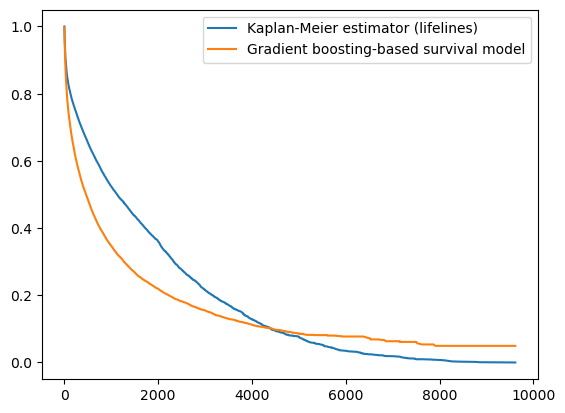

In [76]:
# Compare survival curves predicted by model with the Kaplan-Meier estimate
fig = plt.figure()
ax = plt.subplot(111)

kmf = KaplanMeierFitter(label="Kaplan-Meier estimator (lifelines)")
kmf.fit(UNOS_data['Survival Time'], UNOS_data['Censor (Censor = 1)'])
kmf_S = kmf.survival_function_
x_axis = kmf_S.index.values
ax.plot(kmf_S.index, kmf_S.values, label="Kaplan-Meier estimator (lifelines)")

ax.plot(kmf_S.index, avg_survival_array, label="Gradient boosting-based survival model")

ax.legend()

plt.savefig('1.3.2.png', dpi=100)
plt.show()

## References

[1] Chicco, Davide, and Giuseppe Jurman. “Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone.” BMC Medical Informatics and Decision Making, vol.
20, no. 1 (2020): 1-16.

[2] Weiss, Eric S., Lois U. Nwakanma, Stuart B. Russell, John V. Conte, and Ashish S. Shah. “Outcomes in
bicaval versus biatrial techniques in heart transplantation: an analysis of the UNOS database.” The Journal
of heart and lung transplantation, vol. 27, no. 2 (2008): 178-183.